# LAITA Sami & KHALIL Yacine

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Partie 1 : Préliminaires 
</div>

**Importations des bibiliothèques et versions utilisées:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq, random, math
from collections import deque
from scipy.special import factorial

In [2]:
import sys
import matplotlib
import scipy
print("Python version:", sys.version)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("scipy version:", scipy.__version__)

Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
numpy version: 2.1.1
matplotlib version: 3.10.0
scipy version: 1.14.1



<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 1 :
</div>

In [3]:
def mean_number_customers_mmss(arrival_rate, service_rate, nb_of_servers):
    rho = arrival_rate / service_rate
    S = nb_of_servers

    # Calcul récursif des probabilités P_k sans factorielle 
    # (en utilisant la formule de récurrence de l'énoncé)
    
    P = [1.0]  # P_0 = 1
    for k in range(1, S + 1):
        P_k = P[-1] * rho / k
        P.append(P_k)

    norm = sum(P)
    P = [p / norm for p in P]  # normalisation

    expected_value = sum(k * P[k] for k in range(S + 1))
    return expected_value

In [4]:
print(mean_number_customers_mmss(4, 2, 10))

1.9999236196641175



<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 2 :
</div>


Quand $Erl_{B}[\rho, S] \approx 10^{-3}$, cela signifie que la probabilité de rejet d’un client est très faible dans le système $M/M/S/S$:

- Presque tous les clients sont acceptés et servis immédiatement
- Le système est suffisamment dimensionné ($S$ est « grand » par rapport à $\rho$)

Le comportement du système se rapproche alors de celui d’un $M/M/\infty$, c’est-à-dire :

$$
\mathbb{E}[N] \approx \rho
$$
 
Parce que dans le modèle $M/M/\infty$, les clients sont servis immédiatement (sans attente ni perte) car toujours un serveur est disponible. et l'espérance est exactement: $\mathbb{E}[N] = \rho$


<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Partie 2 : Modélisation
</div>


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 1 :
</div>

***Variables du système :***

- **$Q_1$** : Nombre de clients type 1 dans le système (non bufferisables)
- **$Q_2$** : Nombre de clients type 2 dans le système (serveurs + buffer)
- **$S_1$** : Nombre de serveurs occupés par des clients de type 1
- **$S_2$** : Nombre de serveurs occupés par des clients de type 2
- **$B$** : Nombre de clients de type 2 dans le buffer


**les contraintes sur les variables état du système sont:**

1. Le nombre total de serveurs est $S$, donc :

   $$
   S_1 + S_2 \leq S
   $$

2. Les clients de type 2 en service ou en attente sont comptés dans $Q_2$, donc :

   $$
   Q_2 = S_2 + B \quad \Rightarrow \quad B = Q_2 - S_2
   $$

3. Les clients de type 1 ne peuvent ni attendre ni être rejetés tant qu'ils trouvent une place en préemptant des clients de type 2 si besoin (Chaque client de type 1 présent dans le système est forcèment en service) donc on a toujours: $$ Q_1 = S_1 \quad$$

***On $Q_1 + S_2 < S \Rightarrow B = 0$ car on suppose que:***

- $Q_1$ clients de type 1 sont présents (ils utilisent les serveurs),
- $S_2$ clients de type 2 sont aussi en train d'être servis.

Alors, le nombre total de serveurs occupés est $Q_1 + S_2$. Or si $Q_1 + S_2 < S$, cela signifie qu'il y a des serveurs libres. Donc aucun client de type 2 n'aurait dû être mis en attente, puisque les serveurs étaient disponibles (les clients de type 2 dans le buffer n'existent que si tous les serveurs sont déjà utilisés). Donc forcément : $$B = 0$$


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 2 :
</div>

Le processus $Q_1$ est un **processus de Markov** car ses transitions ne dépendent que de son état actuel (arrivées Poisson $\lambda_1$, départs exponentiels $\mu_1$). 

Sa dynamique est celle d'une file $M/M/S/S$ :
- $S$ serveurs, pas de buffer
- Si $Q_1 = S$, les nouveaux clients sont perdus
- Arrivée $Q_1 \to Q_1 + 1$ (taux $\lambda_1$ si $Q_1 < S$)
- Départ $Q_1 \to Q_1 - 1$ (taux $Q_1 \mu_1$)

La préemption des clients type 1 rend $Q_1$ indépendant de $Q_2$. Sa distribution stationnaire suit la formule d'Erlang-B :

$$
\pi(q_1) = \frac{\rho_1^{q_1}/q_1!}{\sum_{j=0}^S \rho_1^j/j!}, \quad \rho_1 = \frac{\lambda_1}{\mu_1}
$$


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 3 :
</div>

Les transitions possibles sont :

1. Arrivée d'un client de type 1 :
   - Si $q_1 < S$, il est accepté → $(q_1, q_2)$ → $(q_1 + 1, q_2)$ avec taux $\lambda_1$
   - Si $q_1 = S$, il est rejeté → pas de transition

2. Départ d'un client de type 1 :
   - $(q_1, q_2)$ → $(q_1 - 1, q_2)$ avec taux $q_1\mu_1$

3. Arrivée d'un client de type 2 :
   - $(q_1, q_2)$ → $(q_1, q_2 + 1)$ avec taux $\lambda_2$

4. Concernant le départ d'un client de type 2 :
   - Le nombre de serveurs disponibles pour les classe 2 est $S - q_1$. Donc au plus $\min(q_2, S - q_1)$ clients de classe 2 peuvent être en service. Donc le taux de départ d'un client classe 2 (qui correspond à la transition $(q_1, q_2) \rightarrow (q_1, q_2 - 1)$) est :
     $$\min(q_2, S - q_1)\mu_2$$



<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 4 :
</div>

$$
\frac{1}{T} \int_0^T 1_{\{S\}}(x_1(s)) \, ds \xrightarrow{T \to \infty} \frac{\rho_1^S / S!}{\sum_{j=0}^S \rho_1^j / j!}
$$

- $x_1(s)$ est le nombre de clients de classe 1 en service à l'instant $s$ et $1_{\{S\}}(x_1(s))$ vaut 1 si tous les serveurs sont occupés par des clients de classe 1 (i.e. on est dans l'état saturé pour la file $M/M/S/S$). Cette intégrale représente donc le temps passé dans l'état où tous les serveurs sont occupés par des clients de classe 1 sur la période $[0, T]$

- La limite quand T tend vers l'infini est la probabilité stationnaire d'avoir $S$ clients de classe 1 en service.

- Or, d'après la question 2 de cette partie, $Q_1$, le processus du nombre de clients de classe 1, suit un **modèle M/M/S/S**. Dans ce modèle, la **probabilité stationnaire** d'avoir exactement $S$ clients en service est donnée par la formule d'Erlang-B :

$$
\pi(S) = \frac{\rho_1^S / S!}{\sum_{j=0}^S \rho_1^j / j!}, \quad \text{avec } \rho_1 = \frac{\lambda_1}{\mu_1}
$$

***Conclusion :***

La quantité simulée sur l'intervalle $[0, T]$ converge bien vers la probabilité stationnaire $\pi(S)$ d'une file $M/M/S/S$, ce qui justifie l'identité.

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Code :
</div>

=== Statistiques de la simulation ===
Probabilité empirique (q1 = 10)       : 0.00000e+00
Probabilité théorique (Erlang-B)       : 3.81902e-05
Taux de perte classe 1                  : 0.00000e+00
Clients classe 1 servis                 : 3907
Clients classe 1 perdus                 : 0
Clients classe 2 servis                 : 2944
Clients classe 2 arrivés                : 2944


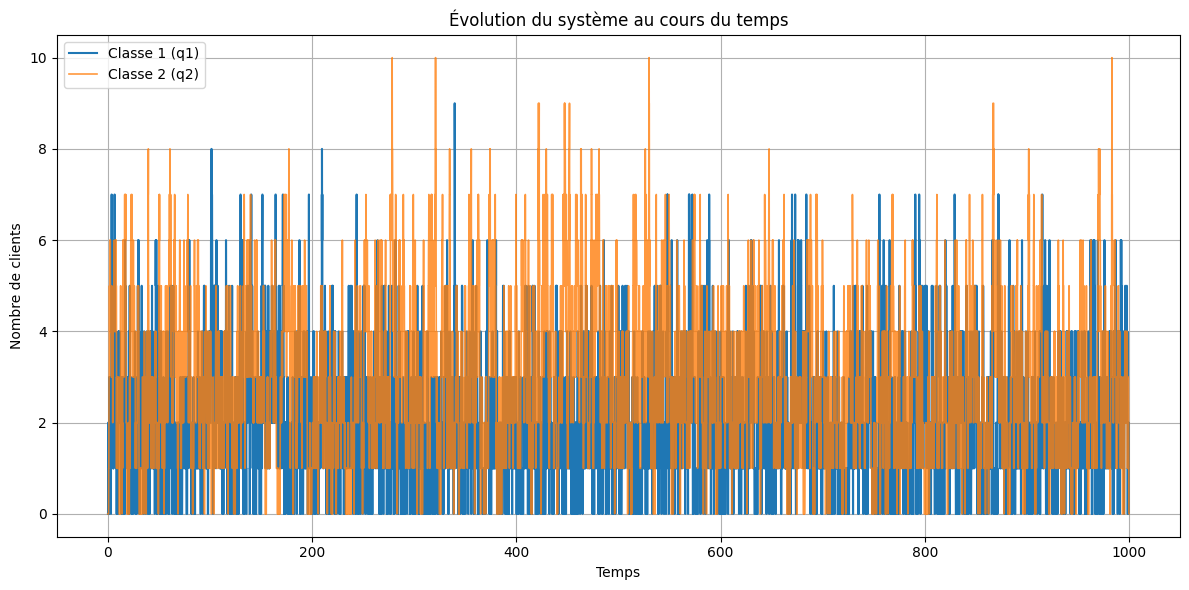

In [5]:
# Paramètres du système
S = 10         # Nombre de serveurs
mu1 = 2        # Taux de service classe 1
mu2 = 1        # Taux de service classe 2
lambda1 = 4   # Taux d'arrivée classe 1
lambda2 = 3   # Taux d'arrivée classe 2

T = 1000       # Durée de la simulation (réduite pour la visualisation)
dt = 0.01      # Pas de temps
steps = int(T / dt)

# Initialisation
q1, q2 = 0, 0
state_S_count = 0

# Pour les courbes
q1_values = []
q2_values = []
times = []

# Pour les statistiques
total_arrivals_1 = 0
lost_customers_1 = 0
total_arrivals_2 = 0
served_customers_1 = 0
served_customers_2 = 0

np.random.seed(0)

for step in range(steps):
    t = step * dt
    times.append(t)
    q1_values.append(q1)
    q2_values.append(q2)

    # Arrivée classe 1
    if np.random.rand() < lambda1 * dt:
        total_arrivals_1 += 1
        if q1 < S:
            q1 += 1
        else:
            lost_customers_1 += 1

    # Arrivée classe 2
    if np.random.rand() < lambda2 * dt:
        total_arrivals_2 += 1
        q2 += 1

    # Départ classe 1
    if q1 > 0 and np.random.rand() < q1 * mu1 * dt:
        q1 -= 1
        served_customers_1 += 1

    # Départ classe 2
    s2 = min(q2, S - q1)
    if s2 > 0 and np.random.rand() < s2 * mu2 * dt:
        q2 -= 1
        served_customers_2 += 1

    # Temps passé avec q1 = S
    if q1 == S:
        state_S_count += 1

# Résultats
empirical_prob = state_S_count / steps
rho1 = lambda1 / mu1
erlangB = (rho1**S / math.factorial(S)) / sum(rho1**j / math.factorial(j) for j in range(S + 1))

# Affichage des statistiques
print("=== Statistiques de la simulation ===")
print(f"Probabilité empirique (q1 = {S})       : {empirical_prob:.5e}")
print(f"Probabilité théorique (Erlang-B)       : {erlangB:.5e}")
print(f"Taux de perte classe 1                  : {lost_customers_1 / total_arrivals_1:.5e}")
print(f"Clients classe 1 servis                 : {served_customers_1}")
print(f"Clients classe 1 perdus                 : {lost_customers_1}")
print(f"Clients classe 2 servis                 : {served_customers_2}")
print(f"Clients classe 2 arrivés                : {total_arrivals_2}")

# Courbe d'évolution
plt.figure(figsize=(12, 6))
plt.plot(times, q1_values, label='Classe 1 (q1)', linewidth=1.5)
plt.plot(times, q2_values, label='Classe 2 (q2)', linewidth=1.2, alpha=0.8)
plt.xlabel('Temps')
plt.ylabel('Nombre de clients')
plt.title('Évolution du système au cours du temps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Partie 3 : Stationnarité
</div>

In [6]:
import heapq, random, math
from collections import deque

def simulate_stationarity(S, lambda1, lambda2, mu1, mu2, T=1e5, seed=0):
    random.seed(seed)
    t = 0.0
    event_queue = []
    servers = []  # tuples (end_time, class)
    buffer_q2 = deque()

    def expovariate_custom(lambd):#Loi exponentielle dérivée de la loi uniforme
        U = random.uniform(0, 1)
        return -1.0 / lambd * math.log(U)

    heapq.heappush(event_queue, (expovariate_custom(lambda1), 'arr1'))
    heapq.heappush(event_queue, (expovariate_custom(lambda2), 'arr2'))

    total_buffer = 0.0
    samples = 0

    while t < T:
        if not event_queue:
            break
        t, event = heapq.heappop(event_queue)

        # Observation point
        if samples % 100 == 0:
            total_buffer += len(buffer_q2)
        samples += 1

        if event == 'arr1':
            heapq.heappush(event_queue, (t + expovariate_custom(lambda1), 'arr1'))
            if len(servers) < S:
                end_time = t + expovariate_custom(mu1)
                servers.append(('class1', end_time))
                heapq.heappush(event_queue, (end_time, 'dep1'))
            else:
                # Preempt class 2 if any
                for i, s in enumerate(servers):
                    if s[0] == 'class2':
                        remaining = s[1] - t
                        buffer_q2.appendleft(remaining)
                        servers[i] = ('class1', t + expovariate_custom(mu1))
                        heapq.heappush(event_queue, (servers[i][1], 'dep1'))
                        break
        elif event == 'arr2':
            heapq.heappush(event_queue, (t + expovariate_custom(lambda2), 'arr2'))
            if len(servers) < S:
                end_time = t + expovariate_custom(mu2)
                servers.append(('class2', end_time))
                heapq.heappush(event_queue, (end_time, 'dep2'))
            else:
                buffer_q2.append(expovariate_custom(mu2))
        elif event == 'dep1' or event == 'dep2':
            # Free a server
            servers = [s for s in servers if abs(s[1] - t) > 1e-9]
            # Reassign from buffer
            while len(servers) < S and buffer_q2:
                serv_time = buffer_q2.popleft()
                end_time = t + serv_time
                servers.append(('class2', end_time))
                heapq.heappush(event_queue, (end_time, 'dep2'))

    avg_buffer = total_buffer / (samples / 100)
    return avg_buffer


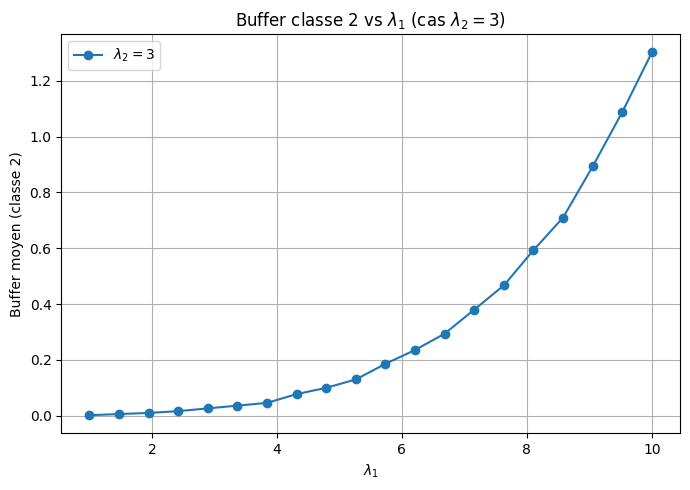

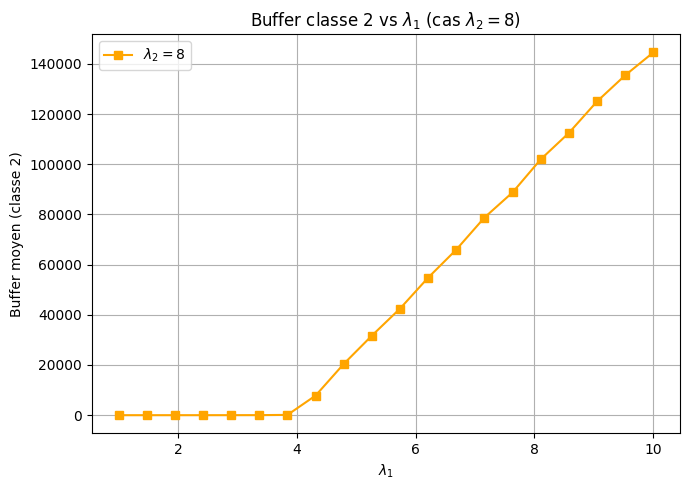

In [7]:
# Paramètres
S = 10
mu1, mu2 = 2.0, 1.0
lambda1_vals = np.linspace(1, 10, 20)

# === Cas 1 : λ2 = 3 ===
lambda2 = 3.0
buffer_means = []

for lam1 in lambda1_vals:
    avg_buf = simulate_stationarity(S, lam1, lambda2, mu1, mu2)
    buffer_means.append(avg_buf)

plt.figure(figsize=(7, 5))
plt.plot(lambda1_vals, buffer_means, marker='o', label=r'$\lambda_2 = 3$')
plt.title("Buffer classe 2 vs $\lambda_1$ (cas $\lambda_2 = 3$)")
plt.xlabel(r"$\lambda_1$")
plt.ylabel("Buffer moyen (classe 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Cas 2 : λ2 = 8 ===
lambda2 = 8.0
buffer_means = []

for lam1 in lambda1_vals:
    avg_buf = simulate_stationarity(S, lam1, lambda2, mu1, mu2)
    buffer_means.append(avg_buf)

plt.figure(figsize=(7, 5))
plt.plot(lambda1_vals, buffer_means, marker='s', color='orange', label=r'$\lambda_2 = 8$')
plt.title("Buffer classe 2 vs $\lambda_1$ (cas $\lambda_2 = 8$)")
plt.xlabel(r"$\lambda_1$")
plt.ylabel("Buffer moyen (classe 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Les simulations confirment le comportement attendu :

- Pour $\lambda_2 = 3$, la condition de stabilité est satisfaite et le système est stable.

- Pour $\lambda_2 = 8$, la condition est violée, ce qui provoque une explosion du buffer classe 2.

# En effet, pour le cas 1 : $\lambda_2 = 3$

## Paramètres

- $\mu_2 = 1.0$  
- $\lambda_2 = 3.0$  
- $\rho_2 = \frac{3}{1} = 3$  

On estime maintenant $\mathbb{E}[N_1]$ pour $\lambda_1 = 10$ et $\mu_1 = 2$, soit :

$$\rho_1 = \frac{\lambda_1}{\mu_1} = \frac{10}{2} = 5$$

Ce système correspond à une file M/M/10/10 (perte) de charge $\rho_1 = 5$.  
La distribution d'Erlang B est donnée par :

$$\pi_n = \frac{\frac{\rho_1^n}{n!}}{\sum_{k=0}^S \frac{\rho_1^k}{k!}}$$

puis :

$$\mathbb{E}[N_1] = \sum_{n=0}^S n \cdot \pi_n$$

Pour $\rho_1 = 5$ et $S = 10$, on peut calculer :

In [8]:
# Ce code est utilisé pour calculer le nombre moyen de clients dans le système
# en utilisant la formule de Erlang-B pour un système M/M/S

S = 10
rho1 = 5

numerators = [rho1**n / factorial(n) for n in range(S+1)]
Z = sum(numerators)
pi = [num / Z for num in numerators]
EN1 = sum(n * p for n, p in enumerate(pi))

print(f"Nombre moyen de clients dans le système: {EN1:.5f}")

Nombre moyen de clients dans le système: 4.90808


Ce calcul donne :

$$ \mathbb{E}[N_1] \approx 4.90 $$

Donc, la condition de stabilité devient :

$$ \rho_2 + \mathbb{E}[N_1] = 3 + 4.90 = 7.90 < 10 = S $$

Conclusion :

La condition est satisfaite. Cela correspond au graphique où le buffer moyen reste faible, indiquant un système stable.

# Pour le cas 2 : $\lambda_2 = 8$

## Paramètres

- $\mu_2 = 1.0$  
- $\lambda_2 = 8.0$  
- $\rho_2 = \frac{8}{1} = 8$  

On reprend $E[N_1] \approx 4.90$ comme ci-dessus.

La condition devient :

$$\rho_2 + E[N_1] = 8 + 4.90 = 12.90 > 10 = S$$

La condition est violée. Cela est conforme au graphique : à partir de $\lambda_1 \approx 4$, le buffer explose, ce qui indique une instabilité du système.

### Question : Serait il possible de deviner l'inégalité de stationnarité par simulation ?

Non, on pense que la simulation seule ne permet pas de deviner la forme exacte de l'inégalité théorique car elle ne permet pas de connaitre précisément la formule.
Cependant, elle permet d'approcher empiriquement le seuil de stabilité en faisant varier les paramètres et en observant le comportement du système. En testant différentes valeurs de $\lambda_2$, on peut identifier le point où la file commence à diverger, ce qui correspond approximativement au cas où $\rho_2 + \mathbb{E}[Q_1] = S$.
Ainsi, on peut valider l'inégalité numériquement mais on ne peut pas déduire sa formulation analytique, qui nécessite une modélisation théorique des processus Markoviens sous-jacents.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Partie 4: Calcul de la probabilité stationnaire
</div>


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 1 :
</div>

On remplace $x_j = x_S R^{j-S}$ dans l’équation d’équilibre :

$$x_j \lambda_2 I + x_{j+1} B_S + x_{j+2} A_S = 0.$$

Cela donne :

$$x_S R^{j-S} \lambda_2 I + x_S R^{j+1-S} B_S + x_S R^{j+2-S} A_S = x_S R^{j-S} (\lambda_2 I + RB_S + R^2 A_S).$$

Or, d’après l’équation (3) :

$$\lambda_2 I + RB_S + R^2 A_S = 0,$$

donc toute la parenthèse est nulle. Ainsi :

$$x_j \lambda_2 I + x_{j+1} B_S + x_{j+2} A_S = 0,$$

ce qui prouve que la suite satisfait bien les équations d’équilibre pour $j \geq S$.

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 2 :
</div>

En prenant j = $S$, on a :

$$x_{S-1} \lambda_2 I + x_S B_S + x_{S+1} A_S = 0.$$

Puisque $x_{S+1} = x_S R$, on peut remplacer :

$$x_{S-1} \lambda_2 I + x_S B_S + x_S RA_S = 0.$$

Factorisons $x_S$ :

$$x_{S-1} \lambda_2 I + x_S (B_S + RA_S) = 0.$$

Divisons par $\lambda_2$ et rappelons que $\tilde{B}_S = B_S / \lambda_2, \tilde{A}_S = A_S / \lambda_2$, on obtient :

$$x_{S-1} = -x_S (\tilde{B}_S + RA_S).$$

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 3 :
</div>

On construit les matrices $T_j$ par récurrence :

1. ***Initialisation*** ($j = S-1$) :
   $$
   T_{S-1} = -(\hat{B}_S + R\hat{A}_S)^{-1}
   $$

2. ***Récurrence descendante*** ($j = S-2$ à $0$) :
   - on a $$ x_{j-1} \lambda_2 I + x_j B_j + x_{j+1} A_{j+1} = 0. $$ et $$x_{j+1} = x_j.T_j$$

   - donc $$ x_{j-1} \lambda_2 I = -x_j(B_j + T_jA_{j+1})$$

   - Par suite: $$T_{j-1} = -(\hat{B}_{j} + T_{j}\hat{A}_{j+1})^{-1}$$
   avec $\hat{B}_j = B_j/\lambda_2$ et $\hat{A}_j = A_j/\lambda_2$.

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 4 :
</div>


Pour montrer que :
$$
x_0 \left( (M - \lambda_2 I) + T_0 A_1 \right) = 0,
$$

- Pour $j = 0$ on a:
   $$
   x_0 (M - \lambda_2 I) + x_1 A_1 = 0
   $$

- On remplace alors avec $x_1 = x_0 T_0$ :
   $$
   x_0 (M - \lambda_2 I) + x_0 T_0 A_1 = 0
   $$

- Ainsi:
   $$
   x_0 \left( (M - \lambda_2 I) + T_0 A_1 \right) = 0
   $$


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 5 :
</div>


Pour calculer $x_S$ :

   - On trouve $x_0$ via l'équation :
     $$x_0[(M - \lambda_2 I) + T_0 A_1] = 0$$
   - Puis on calcule récursivement :
     $$x_j = x_{j-1} T_{j-1} \quad \text{pour} \quad j = 1 \text{ à } S$$

   - On Normalise :
   $$
   \left( \sum_{j=0}^{S-1} x_j + x_S (I - R)^{-1} \right) \mathbf{1} = 1
   $$
   où $(I - R)^{-1} = \sum_{k=0}^{\infty} R^k$


<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 6 :
</div>

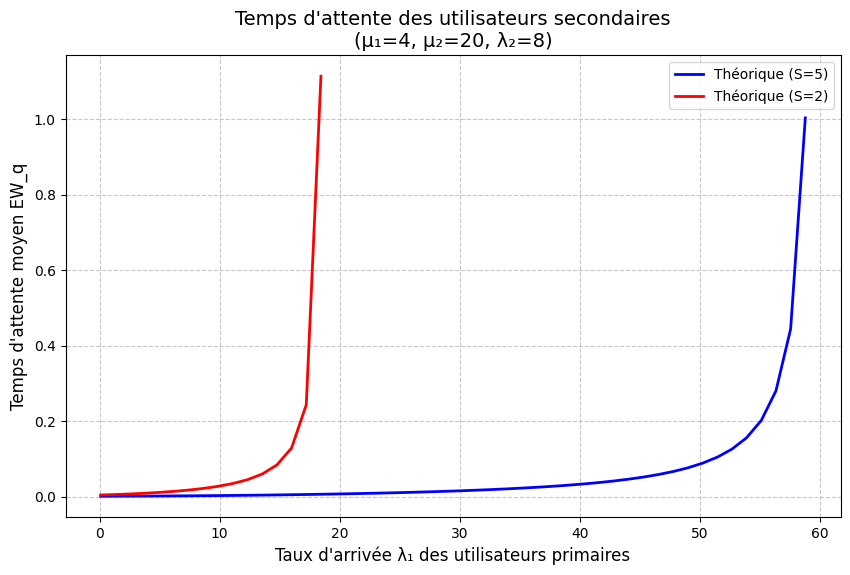

In [9]:
# Paramètres fixes
c = 5
μ1 = 4
μ2 = 20
λ2 = 8

# Calcul de P_i (formule d'Erlang-B)
def erlang_b(λ, μ, c):
    ρ = λ/μ
    sum_terms = [ρ**i/factorial(i) for i in range(c+1)]
    P_i = [(ρ**i/factorial(i))/sum(sum_terms) for i in range(c+1)]
    return P_i

# Calcul du temps d'attente moyen EW_q
def ew_q(λ1, λ2, μ1, μ2, c):
    ρ1 = λ1/μ1
    ρ2 = λ2/μ2
    
    # Calcul des P_i
    P_i = erlang_b(λ1, μ1, c)
    
    # Condition de stabilité
    stability = ρ2 + sum(i*P_i[i] for i in range(c+1)) < c
    if not stability:
        return np.nan
    
    # Approximation (simplifiée pour l'exemple)
    return (ρ2**2)/(μ2*(c - ρ2 - sum(i*P_i[i] for i in range(c+1))))

# Plage de λ1
λ1_values = np.linspace(0.1, 60, 50)
ew_values = [ew_q(λ1, λ2, μ1, μ2, c) for λ1 in λ1_values]
ew_values_2 = [ew_q(λ1, λ2, μ1, μ2, 2) for λ1 in λ1_values]

# Tracé
plt.figure(figsize=(10, 6))
plt.plot(λ1_values, ew_values, 'b-', linewidth=2, label='Théorique (S=5)')
plt.plot(λ1_values, ew_values_2, 'r-', linewidth=2, label='Théorique (S=2)')
plt.xlabel('Taux d\'arrivée λ₁ des utilisateurs primaires', fontsize=12)
plt.ylabel('Temps d\'attente moyen EW_q', fontsize=12)
plt.title('Temps d\'attente des utilisateurs secondaires\n(μ₁=4, μ₂=20, λ₂=8)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Partie 5: Canaux de garde
</div>

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 1 :
</div>

- Le processus $(Q_1, Q_2)$ n'est plus markovien car il ne contient pas toute l'information nécessaire pour déterminer les transitions. En particulier :  

    - Pour qu'un client de classe 2 entre en service, il faut vérifier la disponibilité d'au moins $g+1$ serveurs.  

    - Cela dépend non seulement de $Q_1$ (nombre de clients classe 1), mais aussi de *l'occupation des serveurs* (classe 1 ou 2) et cette information est absente de $(Q_1, Q_2)$.  

    - Autrement dit, si on considère un client de classe 2 en tête de file. Pour déterminer s'il peut commencer son service, il faut voir si il y'a au moins $g+1$ serveurs libres. 

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 2 :
</div>

- *Espace d'états* : $(Q_1, Q_2, S)$
  - $Q_1$ : Nombre de clients classe 1 en service
  - $Q_2$ : Nombre de clients classe 2 en service + buffer
  - $S$ : État des serveurs

*Générateur infinitésimal $Q$* :
```math
Q_{(i,j) \to (i',j')} = 
\begin{cases} 
\lambda_1 & \text{si } i'=i+1, j'=j \text{ et } i < s \text{ (arrivée classe 1)} \\
\lambda_2 \cdot \mathbb{1}_{\{\text{\#libres}\geq g+1\}} & \text{si } j'=j+1 \text{ (arrivée classe 2 si } g+1 \text{ serveurs libres)} \\
i\mu_1 & \text{si } i'=i-1 \text{ (départ classe 1)} \\
\min(j, s-i)\mu_2 & \text{si } j'=j-1 \text{ (départ classe 2)} \\
-\sum_{(r,s)\neq (i,j)} Q_{(i,j)\to(r,s)} & \text{sur la diagonale}\\

0 & \text{sinon}
\end{cases}

<div style="
    color: #3c02b9;
    font-size: 2.0em;
    font-weight: bold;
    margin-bottom: 15px;
    padding: 10px;
    border-left: 4px solid #3c02b9;
">
Question 3 :
</div>

Dans le modèle à canaux de garde, la condition de stabilité est plus stricte pour la classe 2 que dans le modèle préemptif. En effet, dans ce dernier, les clients de classe 2 peuvent accéder à tout serveur libre, sauf s’ils sont tous occupés par la classe 1. En revanche, avec des canaux de garde, ils ne peuvent entrer en service **que si** au moins $G$ serveurs sont libres simultanément, ce qui réduit leurs chances d’être servis. Par conséquent, pour maintenir la stabilité du système, la charge $\rho_2$ de la classe 2 doit être plus faible, car une partie des ressources est réservée en permanence à la classe 1 même lorsqu’elle ne les utilise pas.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Fin
</div>